# word embeddings
Let us consider the two sentences – “You can scale your business.” and “You can grow your business.”. These two sentences have the same meaning. If we consider a vocabulary considering these two sentences, it will constitute of these words: {You, can, scale, grow, your, business}.

A one-hot encoding of these words would create a vector of length 6. The encodings for each of the words would look like this:<br>
You: [1,0,0,0,0,0], Can: [0,1,0,0,0,0], Scale: [0,0,1,0,0,0], Grow: [0,0,0,1,0,0],
Your: [0,0,0,0,1,0], Business: [0,0,0,0,0,1]<br>
In a 6-dimensional space, each word would occupy one of the dimensions, meaning that none of these words has any similarity with each other – irrespective of their literal meanings.<br>
Word2Vec, a word embedding methodology, solves this issue and enables similar words to have similar dimensions and, consequently, helps bring context.<br>

## What is Word2Vec?

Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.<br>
As seen in the image below where word embeddings are plotted, similar meaning words are closer in space, indicating their semantic similarity.

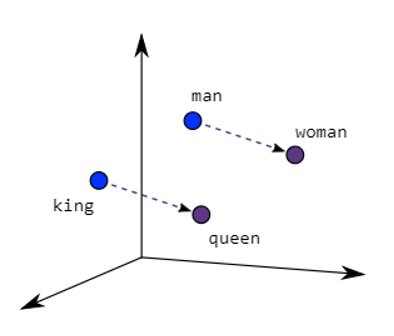

Two different model architectures that can be used by Word2Vec to create the word embeddings are the Continuous Bag of Words (CBOW) model & the Skip-Gram model.


## Continuous Bag of Words (CBOW)

Even though Word2Vec is an unsupervised model where you can give a corpus without any label information and the model can create dense word embeddings, Word2Vec internally leverages a supervised classification model to get these embeddings from the corpus.
The CBOW architecture comprises a deep learning classification model in which we take in context words as input, X, and try to predict our target word, Y.<br>
For example, if we consider the sentence – “Word2Vec has a deep learning model working in the backend.”, there can be pairs of context words and target (center) words. If we consider a context window size of 2, we will have pairs like ([deep, model], learning), ([model, in], working), ([a, learning), deep) etc. The deep learning model would try to predict these target words based on the context words.<br>

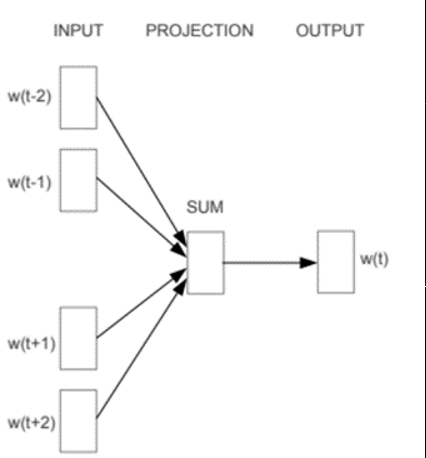

The following steps describe how the model works:
- The context words are first passed as an input to an embedding layer (initialized with some random weights) as shown in the Figure below.
- The word embeddings are then passed to a lambda layer where we average out the word embeddings.
- We then pass these embeddings to a dense SoftMax layer that predicts our target word. We match this with our target word and compute the loss and then we perform backpropagation with each epoch to update the embedding layer in the process.

We can extract out the embeddings of the needed words from our embedding layer, once the training is completed.

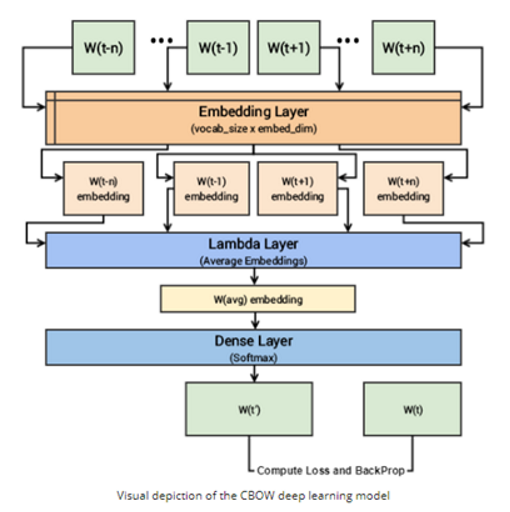

## Skip-gram

In the skip-gram model, given a target (centre) word, the context words are predicted. So, considering the same sentence – “Word2Vec has a deep learning model working in the backend.” and a context window size of 2, given the centre word ‘learning’, the model tries to predict [‘deep’, ’model’] and so on.<br>
Since the skip-gram model has to predict multiple words from a single given word, we feed the model pairs of (X, Y) where X is our input and Y is our label. This is done by creating positive input samples and negative input samples.<br>
Positive Input Samples will have the training data in this form: [(target, context),1] where the target is the target or centre word, context represents the surrounding context words, and label 1 indicates if it is a relevant pair. Negative Input Samples will have the training data in the same form: [(target, random),0]. In this case, instead of the actual surrounding words, randomly selected words are fed in along with the target words with a label of 0 indicating that it’s an irrelevant pair.<br>
These samples make the model aware of the contextually relevant words and consequently generate similar embeddings for similar meaning words.

The following steps describe how the model works:
- Both the target and context word pairs are passed to individual embedding layers from which we get dense word embeddings for each of these two words.
- We then use a ‘merge layer’ to compute the dot product of these two embeddings and get the dot product value.
- This dot product value is then sent to a dense sigmoid layer that outputs either 0 or 1.
- The output is compared with the actual label and the loss is computed followed by backpropagation with each epoch to update the embedding layer in the process.

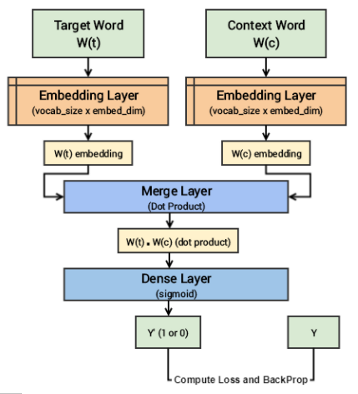

As with CBOW, we can extract out the embeddings of the needed words from our embedding layer, once the training is completed.

In [ ]:
# Word2Vec in Python
# We can generate word embeddings for our corpus in Python using the genism module. Below is a simple illustration of the same.
# Installing modules
# We start by installing the ‘gensim’ and ‘nltk’ modules.
!pip install gensim
!pip install nltk

# Importing libraries
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
# Reading the text data
# We have taken the ‘Amazon Fine Food Reviews’ dataset from Kaggle here. We use the ‘Text’ column of the dataset.
import pandas as pd
rev = pd.read_csv(r"Reviews.csv")
rev.head()
# Preparing the corpus
# We create the list of the words that our corpus has using the following lines of code:
corpus_text = '\n'.join(rev[:1000]['Text'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)
# Building the Word2Vec model using Gensim
# To create the word embeddings using CBOW architecture or Skip Gram architecture, you can use the following respective lines of code:
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0) 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)


## CBOW vs Skip-gram

-  CBOW and Skip-gram are just mirrored versions of each other. CBOW is trained to predict a single(target) word from a fixed window size of context words, whereas Skip-gram does the opposite, and tries to predict several context words from a single input(target) word.
- CBOW is much faster as compared to Skip gram.
-  CBOW learn better syntactic relationships between words while Skip-gram is better in capturing better semantic relationships. In practice, this means that for the word 'cat' CBOW would retrive as closest vectors morphologically similar words like plurals, i.e. 'cats' while Skip-gram would consider morphologically different words (but semantically relevant) like 'dog' much closer to 'cat' in comparison.
- A final consideration to make deals instead with the sensitivity to rare and frequent words. Because Skip-gram rely on single words input, it is less sensitive to overfit frequent words, because even if frequent words are presented more times that rare words during training, they still appear individually, while CBOW is prone to overfit frequent words because they appear several time along with the same context. This advantage over frequent words overfitting leads Skip-gram to be also more efficient in term of documents required to achieve good performances, much less than CBOW (and it's also the reason of the better performances of Skip-gram in capturing semantical relationships).

**According to Mikolov**<br>
<mark>
**Skip-gram**: works well with small amount of the training data, represents well even rare words or phrases.<br>
**CBOW**: several times faster to train than the skip-gram, slightly better accuracy for the frequent words
</mark>